In [2]:
import pandas as pd
import numpy as np

In [3]:
supermarket_data = pd.read_csv("E:\Parsa\project of data analytics\project 2 (تحلیل و پیش بینی تقاضا برای یک محصول)\Supermart Grocery Sales - Retail Analytics Dataset.csv")
print(supermarket_data.describe())


             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000


In [4]:
print(supermarket_data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [5]:
df = pd.DataFrame(supermarket_data)
sales = df.groupby(["Category","Region"])["Sales"].sum().reset_index()
print(sales)

             Category   Region   Sales
0              Bakery  Central  448343
1              Bakery     East  588241
2              Bakery    South  361385
3              Bakery     West  714312
4           Beverages  Central  501194
5           Beverages     East  577206
6           Beverages    South  344666
7           Beverages     West  662247
8   Eggs, Meat & Fish  Central  516642
9   Eggs, Meat & Fish     East  677830
10  Eggs, Meat & Fish    South  360963
11  Eggs, Meat & Fish     West  711966
12        Food Grains  Central  463683
13        Food Grains     East  598868
14        Food Grains    South  353069
15        Food Grains     West  699652
16   Fruits & Veggies  Central  526507
17   Fruits & Veggies     East  564237
18   Fruits & Veggies    South  352162
19   Fruits & Veggies     West  657821
20       Oil & Masala  Central  453293
21       Oil & Masala     East  622071
22       Oil & Masala    North    1254
23       Oil & Masala    South  298859
24       Oil & Masala    

In [6]:
df = df[df["Region"]!="North"]
df.drop(["State","Order ID"], axis=1)

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
1,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80
2,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60
4,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45
5,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70
...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10
9990,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70
9991,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44
9992,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24


In [7]:
from datetime import datetime


df_new = df.copy()
df_new["date"] = df_new["Order Date"].str.replace("/","-")

df_new["date"] = pd.to_datetime(df_new["date"])


df_new["month of date"] = df_new["date"].dt.month
df_new["Year"] = df_new["date"].dt.year
print(df_new)














     Order ID Customer Name           Category      Sub Category         City  \
1         OD2         Sudha          Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain        Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson   Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh        Food Grains   Organic Staples         Ooty   
5         OD6        Adavan        Food Grains   Organic Staples   Dharmapuri   
...       ...           ...                ...               ...          ...   
9989   OD9990        Sudeep  Eggs, Meat & Fish              Eggs      Madurai   
9990   OD9991          Alan             Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi        Food Grains              Rice         Bodi   
9992   OD9993          Peer       Oil & Masala            Spices   Pudukottai   
9993   OD9994        Ganesh        Food Grains      Atta & Flour  Tirunelveli   

      Order Date Region  Sa

In [8]:

print(df_new["month of date"])

1       11
2        6
3       10
4       10
5        6
        ..
9989    12
9990     7
9991     6
9992    10
9993     4
Name: month of date, Length: 9993, dtype: int32


In [9]:
print(df_new["month of date"].sort_values())


741      1
6149     1
6145     1
3164     1
8623     1
        ..
1472    12
7533    12
3688    12
1479    12
9003    12
Name: month of date, Length: 9993, dtype: int32


In [10]:
season_map = {1:"winter",2:"winter",3:"winter",4:"spring",5:"spring",6:"spring",7:"summer",8:"summer",9:"summer",10:"fall",11:"fall",12:"fall"}
df_new["season"] = df_new["month of date"].map(season_map)


In [11]:
import plotly.express as px
category_deman_sales = df_new.groupby(["Category","season","Region","Year"])[["Sales","Discount"]].agg({"Sales":"sum","Discount":"mean"}).reset_index()

fig = px.bar(category_deman_sales, x = "Category" , y = "Sales" , color="season" , facet_row="Year", facet_col="Region" , hover_data={"Discount"} , title="Total sales by category and season",
             height=800 , barmode="group")
fig.show()

In [12]:
sales_quantity = df_new.groupby(["Category","season"])["Sales"].sum().reset_index()
print(sales_quantity)


             Category  season   Sales
0              Bakery    fall  790425
1              Bakery  spring  412691
2              Bakery  summer  631072
3              Bakery  winter  278093
4           Beverages    fall  768570
5           Beverages  spring  455871
6           Beverages  summer  565334
7           Beverages  winter  295538
8   Eggs, Meat & Fish    fall  850397
9   Eggs, Meat & Fish  spring  498308
10  Eggs, Meat & Fish  summer  620230
11  Eggs, Meat & Fish  winter  298466
12        Food Grains    fall  790367
13        Food Grains  spring  400311
14        Food Grains  summer  641911
15        Food Grains  winter  282683
16   Fruits & Veggies    fall  777395
17   Fruits & Veggies  spring  444006
18   Fruits & Veggies  summer  597556
19   Fruits & Veggies  winter  281770
20       Oil & Masala    fall  731814
21       Oil & Masala  spring  469174
22       Oil & Masala  summer  536195
23       Oil & Masala  winter  300005
24             Snacks    fall  815067
25          

In [13]:
df_new["Category"].unique()

array(['Beverages', 'Food Grains', 'Fruits & Veggies', 'Bakery', 'Snacks',
       'Eggs, Meat & Fish', 'Oil & Masala'], dtype=object)

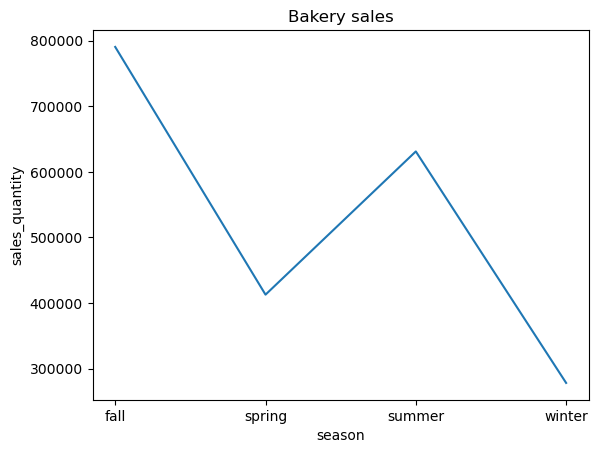

In [14]:
import matplotlib.pyplot as plt

uniqe_season = df_new["season"].unique()
bakery_sales = sales_quantity[sales_quantity["Category"]=="Bakery"]

plt.plot(uniqe_season , bakery_sales["Sales"])
plt.xlabel("season")
plt.ylabel("sales_quantity")
plt.title("Bakery sales")
plt.show()

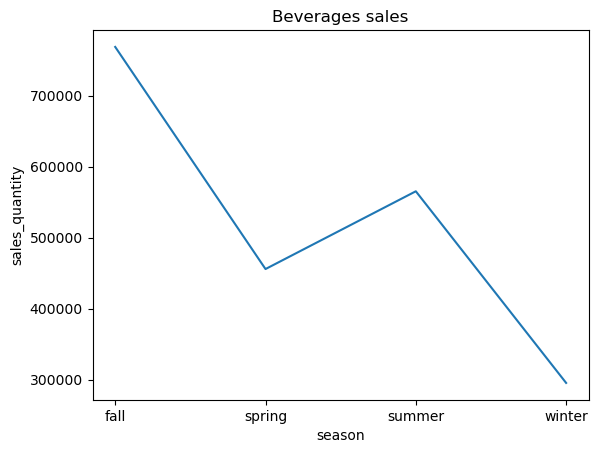

In [15]:
Beverages_sales = sales_quantity[sales_quantity["Category"]=="Beverages"]


plt.plot(uniqe_season , Beverages_sales["Sales"])
plt.xlabel("season")
plt.ylabel("sales_quantity")
plt.title("Beverages sales")
plt.show()

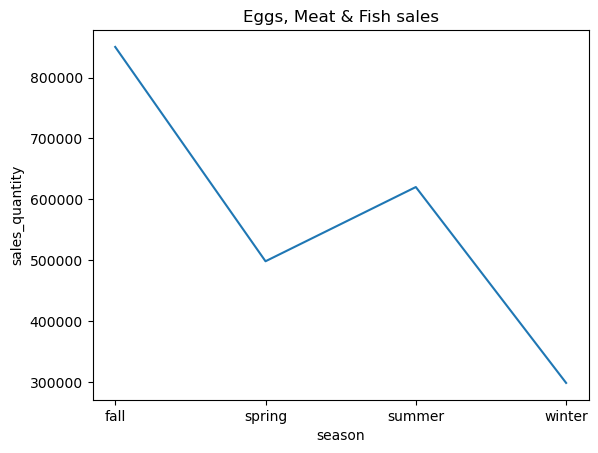

In [16]:
things_sales = sales_quantity[sales_quantity["Category"]=="Eggs, Meat & Fish"]


plt.plot(uniqe_season , things_sales["Sales"])
plt.xlabel("season")
plt.ylabel("sales_quantity")
plt.title("Eggs, Meat & Fish sales")
plt.show()

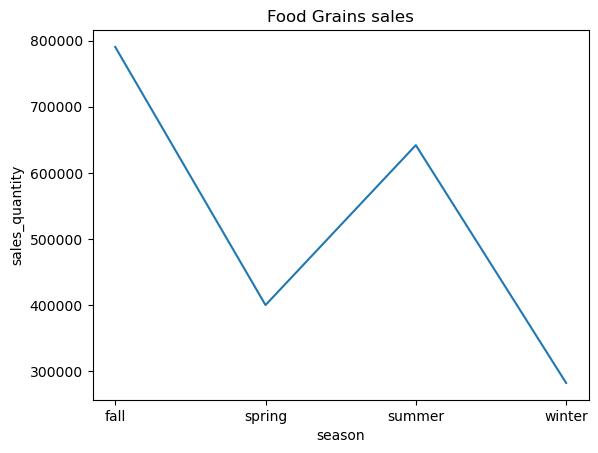

In [17]:
Grains_sales = sales_quantity[sales_quantity["Category"]=="Food Grains"]


plt.plot(uniqe_season , Grains_sales["Sales"])
plt.xlabel("season")
plt.ylabel("sales_quantity")
plt.title("Food Grains sales")
plt.show()

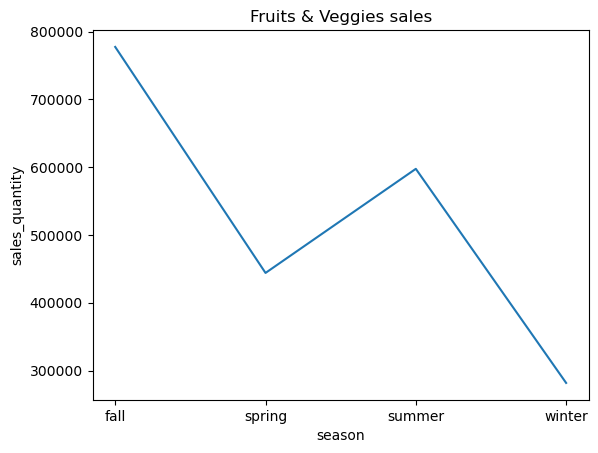

In [18]:
Fruits_sales = sales_quantity[sales_quantity["Category"]=="Fruits & Veggies"]



plt.plot(uniqe_season , Fruits_sales["Sales"])
plt.xlabel("season")
plt.ylabel("sales_quantity")
plt.title("Fruits & Veggies sales")
plt.show()

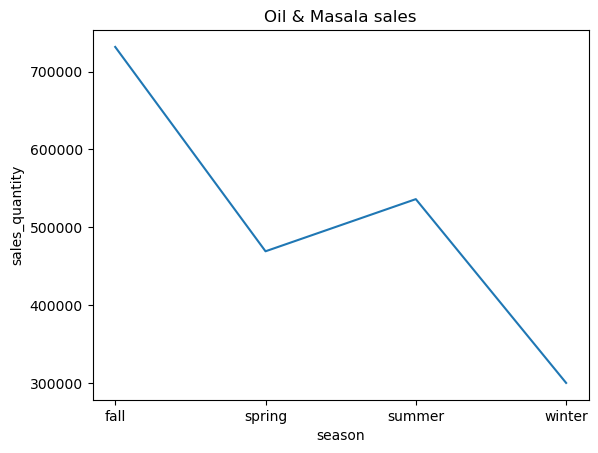

In [19]:
oil_sales = sales_quantity[sales_quantity["Category"]=="Oil & Masala"]



plt.plot(uniqe_season , oil_sales["Sales"])
plt.xlabel("season")
plt.ylabel("sales_quantity")
plt.title("Oil & Masala sales")
plt.show()

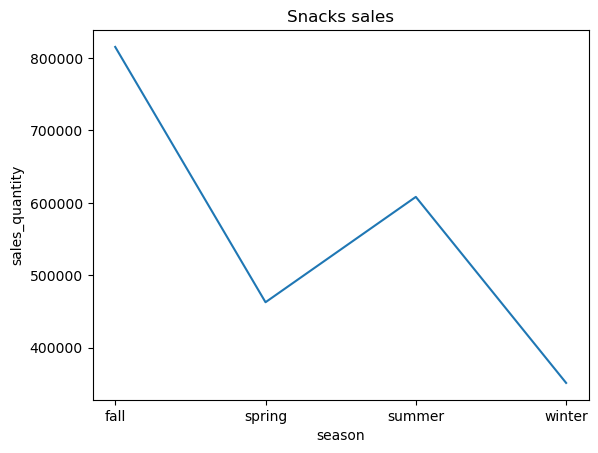

In [20]:
Snacks_sales = sales_quantity[sales_quantity["Category"]=="Snacks"]


plt.plot(uniqe_season , Snacks_sales["Sales"])
plt.xlabel("season")
plt.ylabel("sales_quantity")
plt.title("Snacks sales")
plt.show()